In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.K79RZ6_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.K79RZ6_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


Label: 4


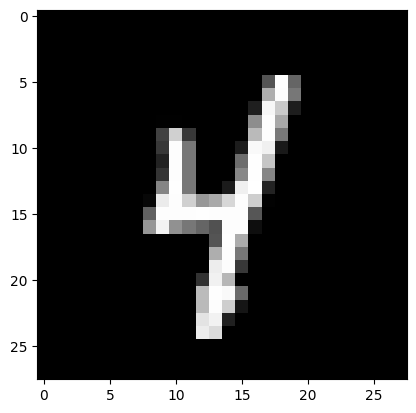

In [3]:
for mnist_example in mnist_train.take(1):
  image, label = mnist_example["image"], mnist_example["label"]

  plt.imshow(image.numpy()[:, :, 0] .astype(np.float32), cmap=plt.get_cmap("gray"))
  print("Label: %d" % label.numpy())

In [4]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split="train")
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [7]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)

mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

In [8]:
info = mnist_builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

In [10]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [11]:
mnist_test, info = tfds.load("mnist", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

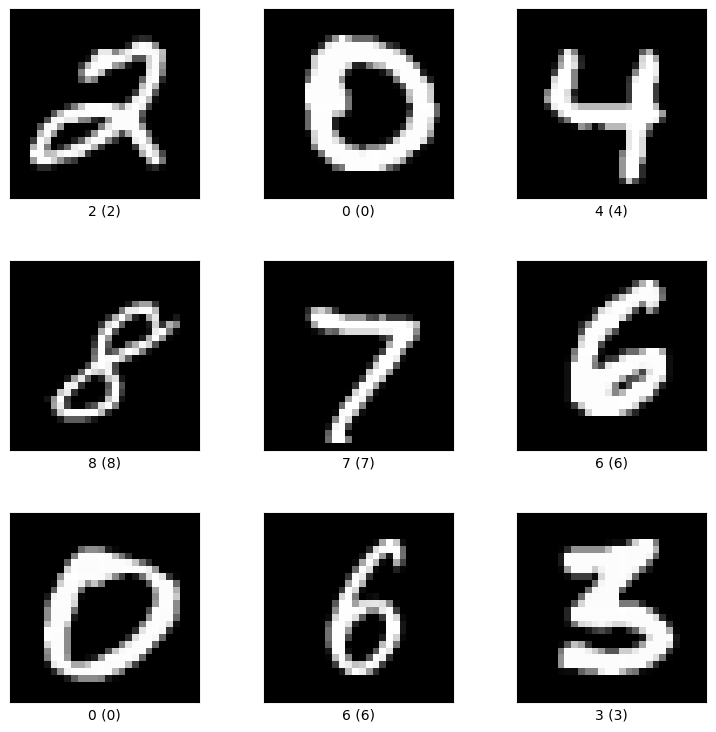

In [14]:
fig = tfds.show_examples(mnist_test, info)

In [15]:
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, None, 28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(None, None, None), dtype=tf.int64, name=None)}>

In [16]:
import tensorflow as tf
import numpy as np

In [17]:
num_classes = 10
num_features = 784

learning_rate = 0.001
training_steps = 500
batch_size = 256
display_step = 100

In [19]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), \
x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
  train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [49]:
  W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
  b = tf.Variable(tf.zeros([num_classes]), name="bias")
  def logistic_regression(x):
      return tf.nn.softmax(tf.matmul(x, W) +b)

  def cross_entropy(y_pred, y_true):
      y_true = tf.one_hot(y_true, depth=num_classes)
      y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
      return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

  def accuracy(y_pred, y_true):
      correct_prediction = tf.equal(tf.argmax(y_pred, 1),
                                 tf.cast(y_true, tf.int64))
      return tf.reduce_mean(tf.cast(
          correct_prediction, tf.float32))
  optimizer = tf.optimizers.SGD(learning_rate)



In [50]:
  def run_optimization(x, y):
# Wrap computation inside a GradientTape for automatic differentiation.
      with tf.GradientTape() as g:
          pred = logistic_regression(x)
          loss = cross_entropy(pred, y)
# Compute gradients.
      gradients = g.gradient(loss, [W, b])
# Update W and b following gradients.
      optimizer.apply_gradients(zip(gradients, [W, b]))

In [51]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 123.643150, accuracy: 0.882812
step: 200, loss: 86.564339, accuracy: 0.906250
step: 300, loss: 101.754944, accuracy: 0.886719
step: 400, loss: 68.115372, accuracy: 0.929688
step: 500, loss: 91.303650, accuracy: 0.917969


In [52]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.911100


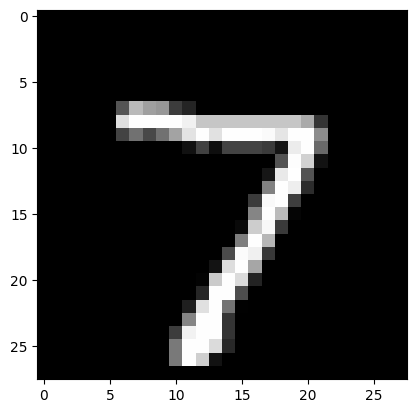

Model prediction: 7


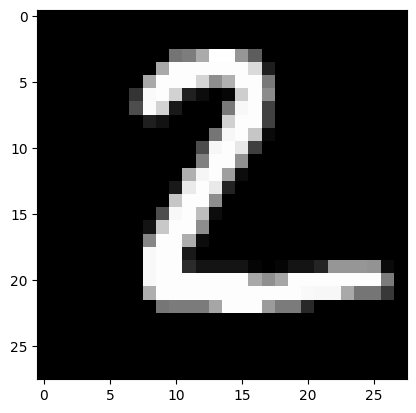

Model prediction: 2


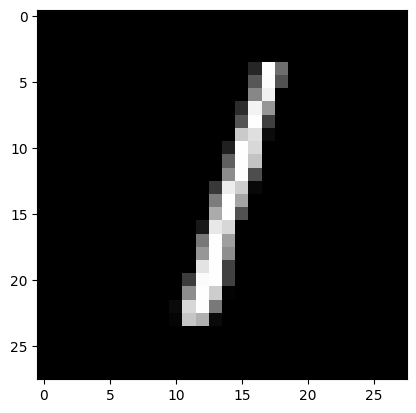

Model prediction: 1


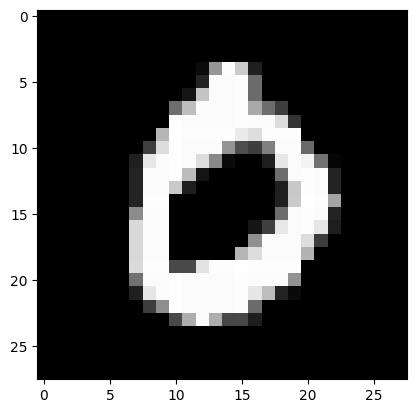

Model prediction: 0


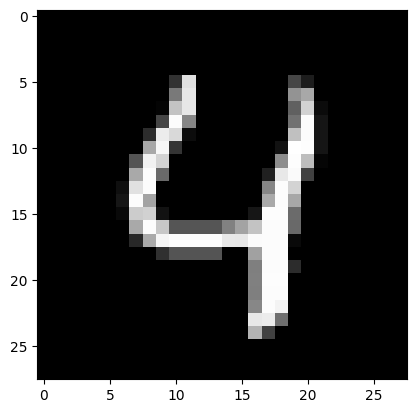

Model prediction: 4


In [56]:
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))